In [14]:
%load_ext autoreload
%autoreload 2
import random
from subprocess import call

# tell jupyter notebook to show plots inline (with output)
%matplotlib inline
import pandas as pd
import numpy as np
from scipy.stats.distributions import norm
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# tell whiny modules to shut up about it 
warnings.simplefilter('ignore', np.RankWarning)
warnings.filterwarnings("ignore", module="matplotlib")
warnings.filterwarnings("ignore", module="statsmodels")

import netgen as ng

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [1205]:
ng.setDirectory('directsweep')

In [1166]:
ng.getDirectory()

'directsweep0'

In [1165]:
ng.configureSweep(popscale=0.5, BaseStim = 2.3, WrongStim = [2.50], RightStim = [2.54], Dynamic=[30], indirect=[1], direct=[0.95,1,1.05])

3

In [1167]:
ng.compileAndRunSweep(2000,0,3)

KeyboardInterrupt: 

In [1206]:
results = ng.readAllTrialResults(699,0,3)

In [1169]:
results[0][0]['Dynamic']

30

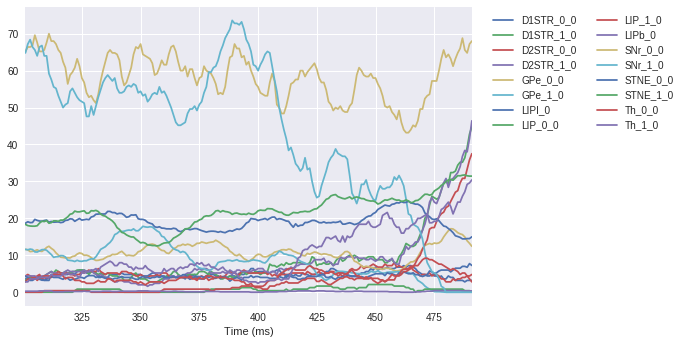

In [1176]:
results[0][0]['popfreqs'].plot(x='Time (ms)')
# _ = plt.legend(fontsize=13)
ax = plt.subplot(111)
ax.legend(loc='upper center', bbox_to_anchor=(1.25, 1),
          ncol=2, fancybox=True, shadow=True)

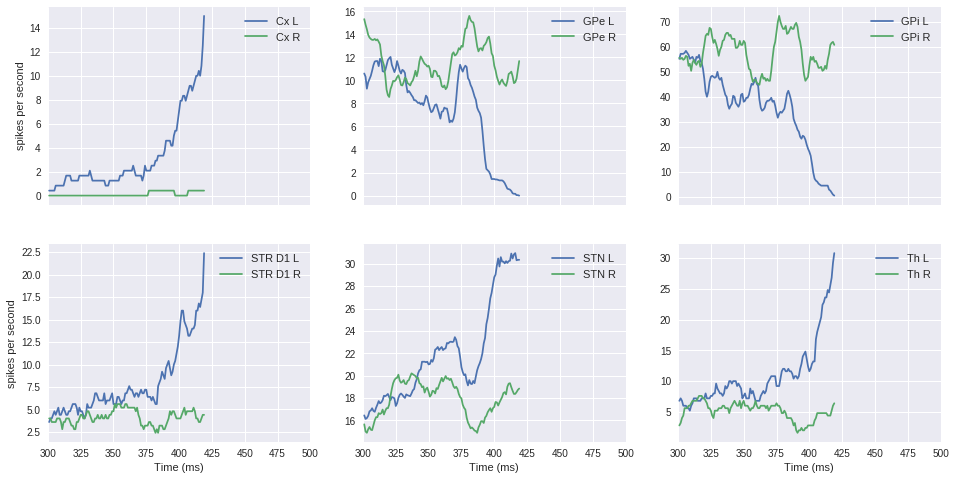

In [1438]:
f, (ax1, ax2) = plt.subplots(2, 3, figsize=(16,8), sharex=True)
result = results[1][6]
for i in range(0,result['dims']['choices']):
    result['popfreqs'].plot(x='Time (ms)', y='LIP_'+str(i)+'_0', ax=ax1[0])
    result['popfreqs'].plot(x='Time (ms)', y='GPe_'+str(i)+'_0', ax=ax1[1])
    result['popfreqs'].plot(x='Time (ms)', y='SNr_'+str(i)+'_0', ax=ax1[2])
    result['popfreqs'].plot(x='Time (ms)', y='D1STR_'+str(i)+'_0', ax=ax2[0])
    result['popfreqs'].plot(x='Time (ms)', y='STNE_'+str(i)+'_0', ax=ax2[1])
    result['popfreqs'].plot(x='Time (ms)', y='Th_'+str(i)+'_0', ax=ax2[2])

ax1[0].legend(['Cx L', 'Cx R'], fontsize=11)
ax1[1].legend(['GPe L', 'GPe R'], fontsize=11)
ax1[2].legend(['GPi L', 'GPi R'], fontsize=11)
ax2[0].legend(['STR D1 L', 'STR D1 R'], fontsize=11)
ax2[1].legend(['STN L', 'STN R'], fontsize=11)
ax2[2].legend(['Th L', 'Th R'], fontsize=11)

for ax, axx in zip(ax1, ax2):
    ax.set_xlim(300, 500)
    axx.set_xlim(300, 500)
ax1[0].set_ylabel('spikes per second')
ax2[0].set_ylabel('spikes per second')
        
plt.savefig('/home/mclapp/firing_ratesA.png')

In [1415]:
print(1)

1


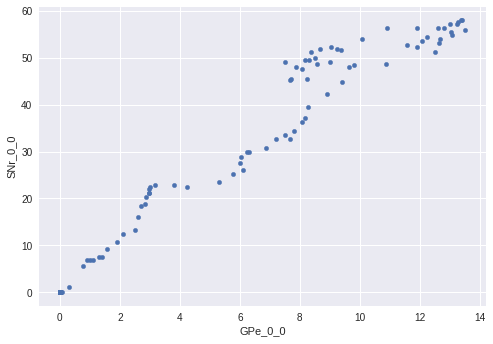

In [769]:
results[0][0]['popfreqs'].plot(x='GPe_0_0', y='SNr_0_0', kind='scatter')

In [1209]:
decisions = []
for sn in range(3):
    decisions.append([])
    for result in results[sn]:
        decisions[sn].append(ng.findOutputs(result)['decision made'])

In [1293]:
rightreact = []
wrongreact = []
allreact = []
accuracy = []
completed = []
for sn in range(3):
    rightreact.append([])
    wrongreact.append([])
    allreact.append([])
    for decision in decisions[sn]:
        if decision['pathvals'] is None:
            continue 
        elif decision['pathvals'] == [0]:
            rightreact[sn].append(decision['delay'])
            allreact[sn].append(decision['delay'])
        else:
            wrongreact[sn].append(decision['delay'])
            allreact[sn].append(decision['delay'])
    completed.append((len(rightreact[sn])+len(wrongreact[sn]))/len(decisions[sn]))
    if len(rightreact[sn])+len(wrongreact[sn]) > 0:
        accuracy.append(len(rightreact[sn])/(len(rightreact[sn])+len(wrongreact[sn])))
    else:
        accuracy.append(-1)

In [1052]:
len(rightreact[1])

29

In [1184]:
for sn in range(3):
    print(sum(rightreact[sn]) / len(rightreact[sn]), sum(wrongreact[sn]) / len(wrongreact[sn]))

238.15365974 223.664338611
185.831060599 168.902102579
121.217237003 119.532893969


In [1185]:
for sn in range(3):
    print((sum(rightreact[sn])+sum(wrongreact[sn])) / (len(rightreact[sn]) + len(wrongreact[sn])))

235.110902303
180.851955299
120.60496863


In [1174]:
print(accuracy,completed)

[0.79, 0.7058823529411765, 0.6364942528735632] [0.4291845493562232, 0.899856938483548, 0.9957081545064378]


0.95 1
1 1
1.05 1


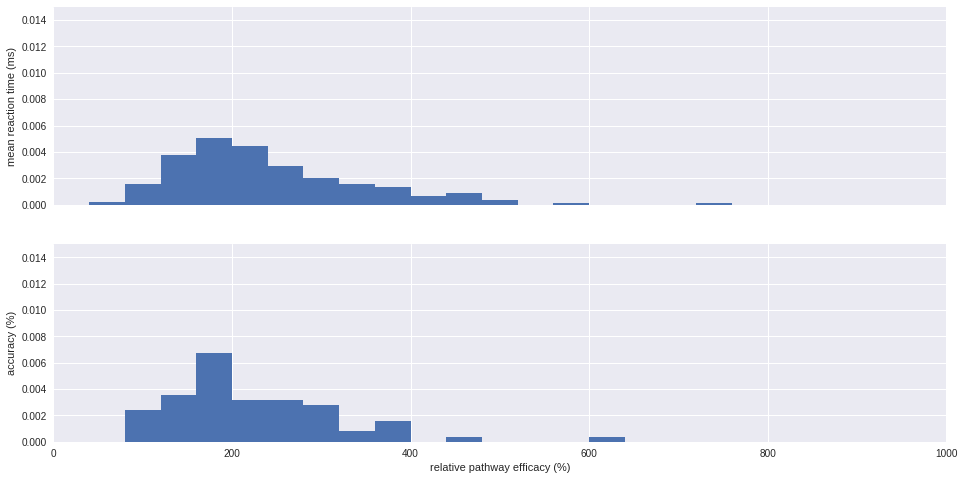

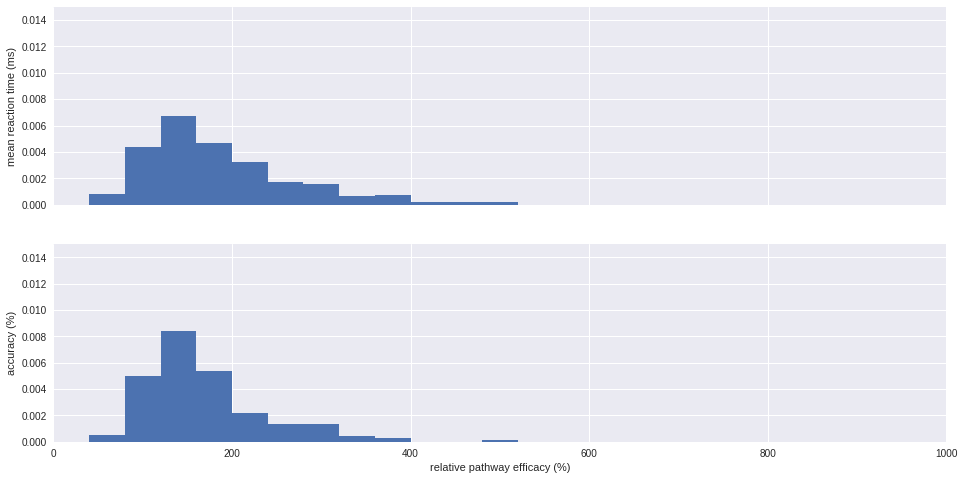

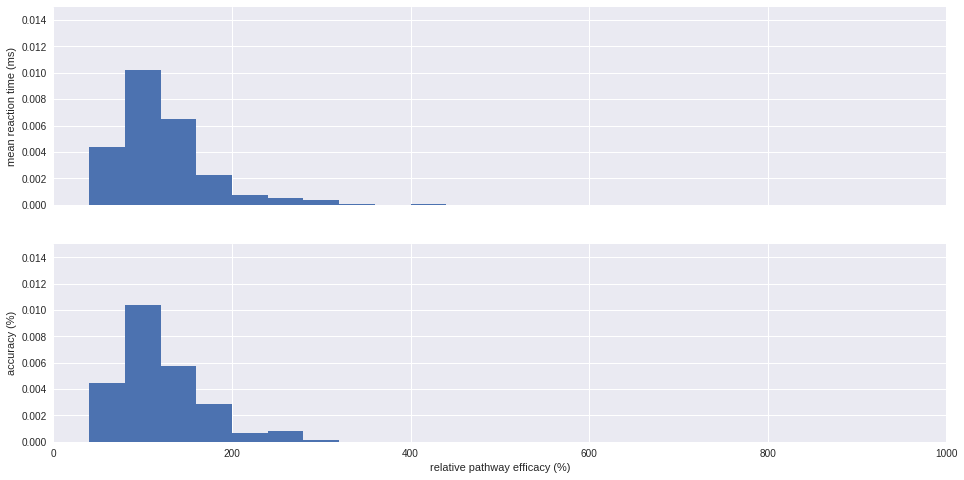

In [1292]:
for sn in range(3):
    print(results[sn][0]['direct'], results[sn][0]['indirect'])
    f, (ax1, ax2) = plt.subplots(2, 1, figsize=(16,8), sharex=True)
    pd.Series(rightreact[sn]).hist(bins=25, range=[0,1000], ax=ax1, normed=True)
    pd.Series(wrongreact[sn]).hist(bins=25, range=[0,1000], ax=ax2, normed=True)
    plt.xlabel('relative pathway efficacy (%)')
    ax1.set_ylabel('mean reaction time (ms)')
    ax2.set_ylabel('accuracy (%)')
    ax1.axis([0,1000,0,.015])
    ax2.axis([0,1000,0,.015])
    #plt.savefig('/home/mclapp/RTs_direct'+str(results[sn][0]['direct']*100)+'%_indirect'+str(results[sn][0]['indirect']*100)+'%.png')

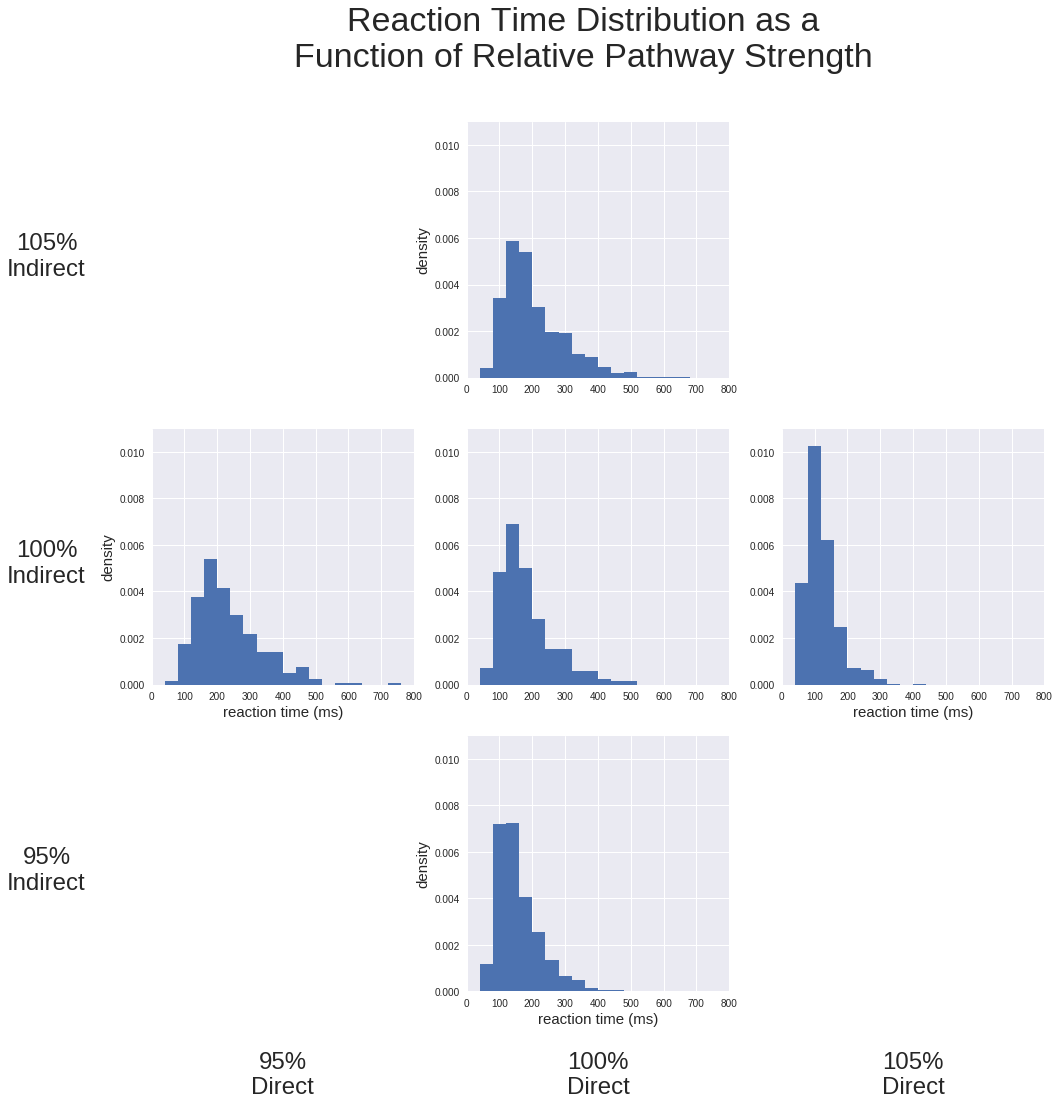

In [1371]:
f, ax = plt.subplots(3, 3, figsize=(16,16))
pd.Series(allreact[0]).hist(bins=25, range=[0,1000], ax=ax[1,0], normed=True)
pd.Series(highindir).hist(bins=25, range=[0,1000], ax=ax[0,1], normed=True)
pd.Series(midindir).hist(bins=25, range=[0,1000], ax=ax[1,1], normed=True)
pd.Series(lowindir).hist(bins=25, range=[0,1000], ax=ax[2,1], normed=True)
pd.Series(allreact[2]).hist(bins=25, range=[0,1000], ax=ax[1,2], normed=True)
ax[0,0].axis('off')
ax[0,1].axis([0,800,0,.011])
ax[0,1].text(-1.6,.4,"105%\nIndirect",fontsize=24,horizontalalignment='center',transform=ax[0,1].transAxes)
ax[0,2].axis('off')
ax[1,0].axis([0,800,0,.011])
ax[1,0].text(.5,-1.6,"95%\nDirect",fontsize=24,horizontalalignment='center',transform=ax[1,0].transAxes)
ax[1,1].axis([0,800,0,.011])
ax[1,1].text(.5,-1.6,"100%\nDirect",fontsize=24,horizontalalignment='center',transform=ax[1,1].transAxes)
ax[1,1].text(-1.6,.4,"100%\nIndirect",fontsize=24,horizontalalignment='center',transform=ax[1,1].transAxes)
ax[1,2].axis([0,800,0,.011])
ax[1,2].text(.5,-1.6,"105%\nDirect",fontsize=24,horizontalalignment='center',transform=ax[1,2].transAxes)
ax[2,0].axis('off')
ax[2,1].axis([0,800,0,.011])
ax[2,1].text(-1.6,.4,"95%\nIndirect",fontsize=24,horizontalalignment='center',transform=ax[2,1].transAxes)
ax[2,2].axis('off')
ax[1,0].set_ylabel('density',fontsize=15)
ax[0,1].set_ylabel('density',fontsize=15)
ax[2,1].set_ylabel('density',fontsize=15)
ax[2,1].set_xlabel('reaction time (ms)',fontsize=15)
ax[1,0].set_xlabel('reaction time (ms)',fontsize=15)
ax[1,2].set_xlabel('reaction time (ms)',fontsize=15)
plt.suptitle("Reaction Time Distribution as a\nFunction of Relative Pathway Strength",fontsize=34)
plt.savefig('/home/mclapp/RTs_all%.png')

In [1211]:
summary = open('summary.txt', 'a')
summary.write("direct,indirect,result,rt\n")
for sn in range(3):
    for result in results[sn]:
        if (result['direct'] != 1 and result['outputs']['decision made']['pathvals'] is not None):
            if(result['direct'] < 1):
                summary.write("low,")
            elif(result['direct'] > 1):
                summary.write("high,")
            else:
                summary.write("mid,")
            if(result['indirect'] < 1):
                summary.write("low,")
            elif(result['indirect'] > 1):
                summary.write("high,")
            else:
                summary.write("mid,")
            summary.write(str(result['outputs']['decision made']['pathvals'][0]) + ',')
            summary.write(str(result['outputs']['decision made']['delay']))
            summary.write("\n")
    summary.flush()
summary.close()

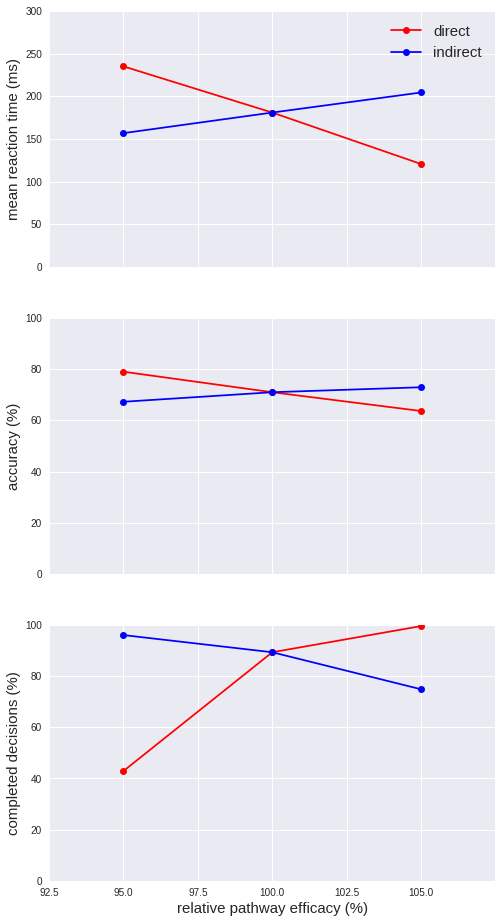

In [1404]:
f, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(8,16), sharex=True)
ax1.plot([95,100,105], [235.110902303,180.946142407,120.60496863], 'ro-')
ax1.plot([95,100,105], [156.812213344,180.946142407,204.493851003], 'bo-')
ax1.axis([92.5, 107.5, 0, 300])
ax2.plot([i * 100 for i in [.95,1,1.05]], [i * 100 for i in [0.79, 0.7098674521354934, 0.6364942528735632]], 'ro-')
ax2.plot([i * 100 for i in [.95,1,1.05]], [i * 100 for i in [0.6726027397260274, 0.7098674521354934, 0.7293497363796133]], 'bo-')
ax2.axis([92.5, 107.5, 0, 100])
ax3.plot([i * 100 for i in [.95,1,1.05]], [i * 100 for i in [0.4291845493562232, 0.8934210526315789, 0.9957081545064378]], 'ro-')
ax3.plot([i * 100 for i in [.95,1,1.05]], [i * 100 for i in [0.9605263157894737, 0.8934210526315789, 0.7486842105263158]], 'bo-')
ax3.axis([92.5, 107.5, 0, 100])
plt.xticks(np.arange(min([95,100,105])-2.5, max([95,100,105])+2.5, 2.5))
ax1.legend(['direct', 'indirect'], loc='upper right',fontsize=15)
plt.xlabel('relative pathway efficacy (%)',fontsize=15)
ax1.set_ylabel('mean reaction time (ms)',fontsize=15)
ax2.set_ylabel('accuracy (%)',fontsize=15)
ax3.set_ylabel('completed decisions (%)',fontsize=15)
plt.savefig('/home/mclapp/opposing2.png')
plt.show()

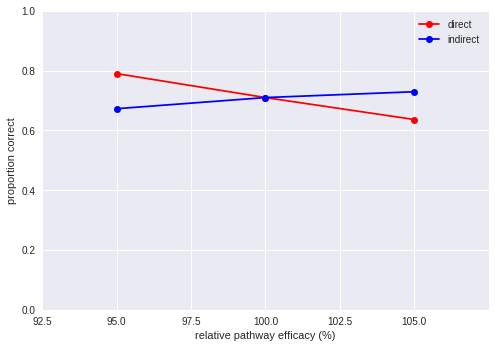

In [1267]:
plt.plot([i * 100 for i in [.95,1,1.05]], [0.79, 0.7098674521354934, 0.6364942528735632], 'ro-')
plt.plot([i * 100 for i in [.95,1,1.05]], [0.6726027397260274, 0.7098674521354934, 0.7293497363796133], 'bo-')
plt.axis([92.5, 107.5, 0, 1])
plt.xticks(np.arange(min([95,100,105])-2.5, max([95,100,105])+2.5, 2.5))
plt.legend(['direct', 'indirect'], loc='upper right')
plt.xlabel('relative pathway efficacy (%)')
plt.ylabel('proportion correct')
plt.show()

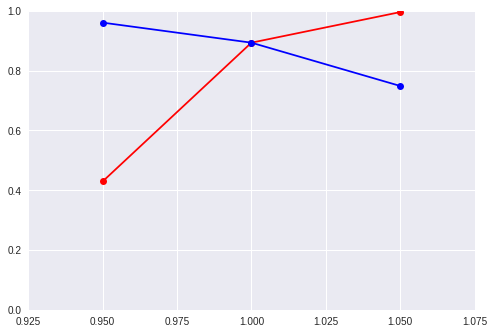

In [1237]:
plt.plot([.95,1,1.05], [0.4291845493562232, 0.8934210526315789, 0.9957081545064378], 'ro-')
plt.plot([.95,1,1.05], [0.9605263157894737, 0.8934210526315789, 0.7486842105263158], 'bo-')
plt.axis([.925, 1.075, 0, 1])
plt.xticks(np.arange(min([.95,1,1.05])-0.025, max([.95,1,1.05])+0.025, 0.025))
plt.show()

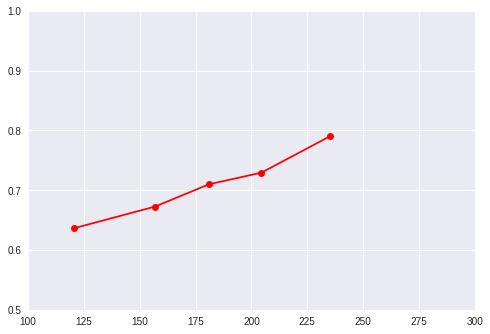

In [1253]:
plt.plot([120.60496863,156.812213344,180.946142407,204.493851003,235.110902303], [0.6364942528735632,0.6726027397260274,0.7098674521354934,0.7293497363796133,.79], 'ro-')
plt.axis([100, 300, .5, 1])
plt.show()

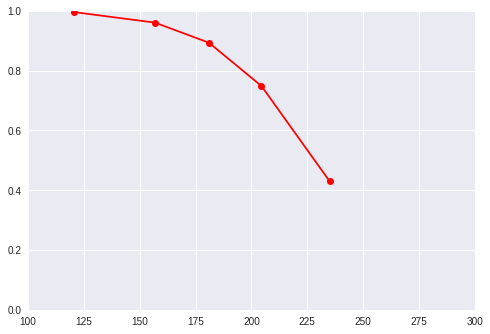

In [1254]:
plt.plot([120.60496863,156.812213344,180.946142407,204.493851003,235.110902303], [0.9957081545064378,0.9605263157894737,0.8934210526315789,0.7486842105263158,0.4291845493562232], 'ro-')
plt.axis([100, 300, 0, 1])
plt.show()

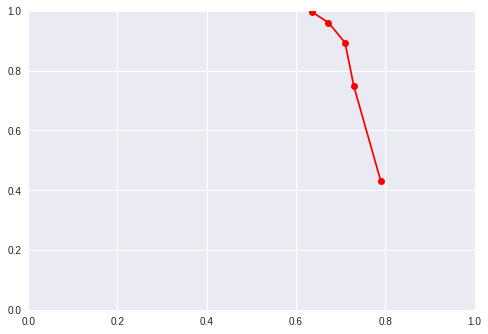

In [1257]:
plt.plot([0.6364942528735632,0.6726027397260274,0.7098674521354934,0.7293497363796133,.79], [0.9957081545064378,0.9605263157894737,0.8934210526315789,0.7486842105263158,0.4291845493562232], 'ro-')
plt.axis([0, 1, 0, 1])
plt.show()

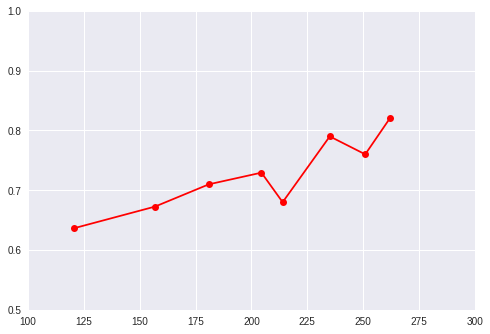

In [1252]:
plt.plot([120.60496863,156.812213344,180.946142407,204.493851003,214,235.110902303,251,262], [0.6364942528735632,0.6726027397260274,0.7098674521354934,0.7293497363796133,.68,.79,.76,.82], 'ro-')
plt.axis([100, 300, .5, 1])
plt.show()

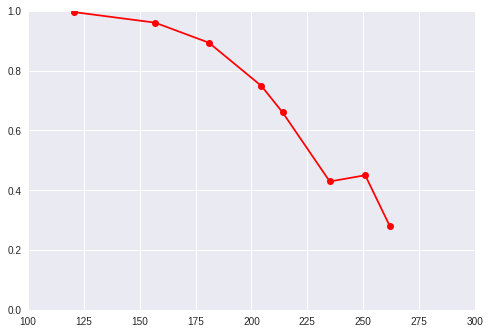

In [1255]:
plt.plot([120.60496863,156.812213344,180.946142407,204.493851003,214,235.110902303,251,262], [0.9957081545064378,0.9605263157894737,0.8934210526315789,0.7486842105263158,.66,0.4291845493562232,.45,.28], 'ro-')
plt.axis([100, 300, 0, 1])
plt.show()